In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

# بارگذاری داده‌ها
df = pd.read_csv("Housing.csv")

# انتخاب ویژگی‌ها و هدف
features = ['bedrooms', 'bathrooms', 'guestroom', 'airconditioning', 'parking']
target = 'price'

# کپی داده‌های مورد نیاز
data = df[features + [target]].copy()

# تبدیل مقادیر categorical به عددی
label_encoders = {}
for col in ['guestroom', 'airconditioning']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# تقسیم داده به آموزش و تست
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی و ارزیابی مدل
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test , y_pred)

# r2 = r2_score(y_test, y_pred)

# نمایش نتایج
print("ضریب‌ها:", model.coef_)
print("عرض از مبدأ:", model.intercept_)
print("میانگین مربعات خطا (MSE):", mse)
print("میانگین قدر مطلق خظا (MAE) : " , mae)
# print("ضریب تعیین (R²):", r2)


ضریب‌ها: [ 289724.33226116 1330688.27975891  767826.72147561 1136945.90941329
  469402.02032447]
عرض از مبدأ: 1355892.616382311
میانگین مربعات خطا (MSE): 2686481647686.489
میانگین قدر مطلق خظا (MAE) :  1197370.0482014527


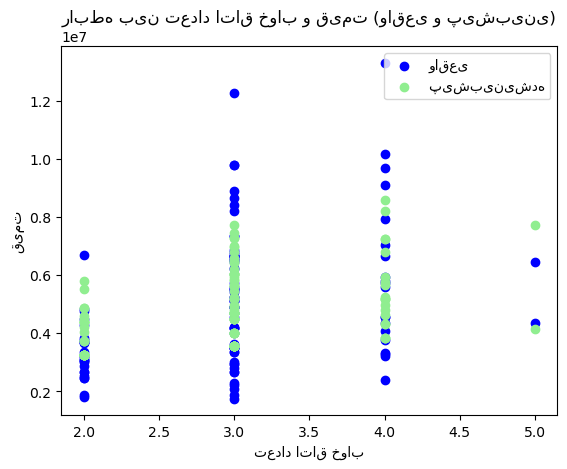

In [9]:
import matplotlib.pyplot as plt

# فقط bedroom را برای محور X رسم می‌کنیم
plt.scatter(X_test['bedrooms'], y_test, color='blue', label='واقعی')
plt.scatter(X_test['bedrooms'], y_pred, color='lightgreen', label='پیش‌بینی‌شده')
plt.xlabel("تعداد اتاق خواب")
plt.ylabel("قیمت")
plt.legend()
plt.title("رابطه بین تعداد اتاق خواب و قیمت (واقعی و پیش‌بینی)")
plt.show()
